# EDA with Python 

## Titanic Dataset from Kaggle

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The Data

In [39]:

train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


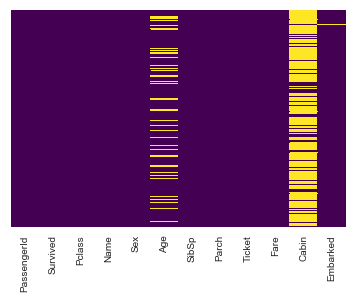

In [41]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

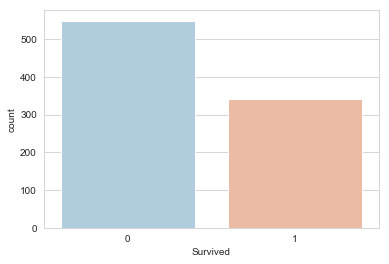

In [42]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',palette='RdBu_r')

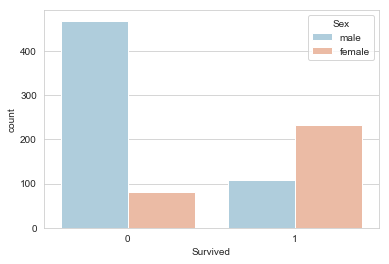

In [43]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',palette='RdBu_r',hue='Sex')


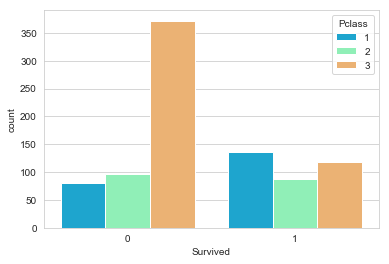

In [44]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',palette='rainbow',hue='Pclass')

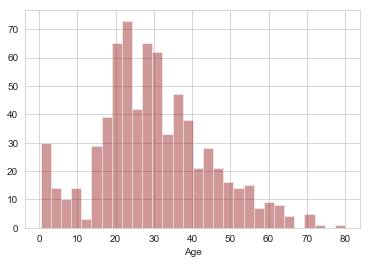

In [45]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins =30)

# same histogram we can draw in matplotlib

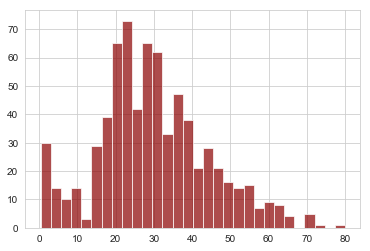

In [46]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

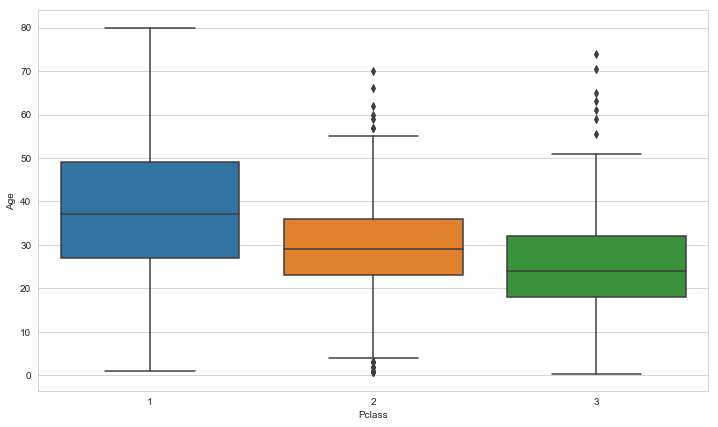

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# Creating a function to replacing NAN values

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [50]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

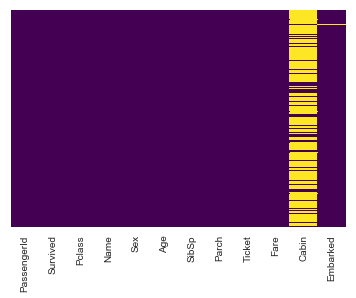

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [13]:
#train = pd.read_csv('titanic_train.csv',usecols=['Name','Sex','Cabin','Embarked'])

In [14]:
train.head()

,Name,Sex,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,"Heikkinen, Miss. Laina",female,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,"Allen, Mr. William Henry",male,NaN,S


# FEATURE ENGINEERING

In [15]:
dummy = pd.get_dummies(train['Sex'])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
train = pd.concat([train,dummy], axis =1)
train.head()

,Name,Sex,Cabin,Embarked,female,male
0,"Braund, Mr. Owen Harris",male,NaN,S,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,1,0
2,"Heikkinen, Miss. Laina",female,NaN,S,1,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,1,0
4,"Allen, Mr. William Henry",male,NaN,S,0,1


# Different methods to print columns names : 
## column name via iterations with the use of for loop 
### simple method to print column as a list

In [17]:
for col in train.columns:   ### FIRST METHOD USING ITERATIONS (FOR LOOP)
    print(col,'\n')
    
print(list(train.columns))  ### SECOND METHOD PRINT COLUMNS AS A LIST
print(list(train.columns.values)) ### THIRD METHOD PRINT COLUMNS AS A LIST

Name 

Sex 

Cabin 

Embarked 

female 

male 

['Name', 'Sex', 'Cabin', 'Embarked', 'female', 'male']
['Name', 'Sex', 'Cabin', 'Embarked', 'female', 'male']


# Mercideas Benz Data Set for Feature Engineering: 
## Example of Multiple Catogrical Variables:

In [18]:
data=pd.read_csv('mercedesbenz.csv')
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [20]:
### look how many labels each variable has:

for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [21]:
## lets find out how many columns we got agter applying one hot encoding for these variables(X1,X2,X3,X4,X5,X6)

pd.get_dummies(data,drop_first=True).shape

(4209, 117)

In [22]:
## lets find the top 10 most frequent categories for the variable X2


data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [23]:
## Lets make a list with the most frequent categories of the variable


top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [24]:
## Now we make 10 binary variables

for label in top_10:
    data[label]=np.where(data['X2']==label,1,0)
data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [25]:
## get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)
## read the data again
data = pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])

## ENCODE X2 INTO THE 10 MOST FREQUENT CATEGORIES

one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [26]:
##find the 10 most frequent categories for X1

top_10 =[x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

## Now create the most frequent dummy variables for X1

one_hot_top_x(data,'X1',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
alphebet = ('a','b','c','d','e')
df5 = pd.DataFrame(data = alphebet,columns = ['ALPHEBET'])
df5

,ALPHEBET
0,a
1,b
2,c
3,d
4,e


In [29]:
labelencoder = LabelEncoder()
df5['ALPHEBET_Cat'] = labelencoder.fit_transform(df5['ALPHEBET'])
df5

,ALPHEBET,ALPHEBET_Cat
0,a,0
1,b,1
2,c,2
3,d,3
4,e,4


# Missing Data Imputation

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [31]:
# let's load the titanic dataset

data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# you can determine the total number of missing values using
# the isnull method plus the sum method on the dataframe

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# alternatively, you can call the mean method after isnull
# to visualise the percentage of the dataset that 
# contains missing values for each variable

data.isnull().mean()


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64